<a href="https://colab.research.google.com/github/Jameslorry6666/Micheal.iml/blob/master/Ensembles_in_Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# disabling the output of warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# scikit-learn bootstrap
from sklearn.utils import resample

In [3]:
# data set
data = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

# Bootstrapping
boot = resample(data, replace=True, n_samples=4, random_state=1)
print('Bootstrap Sample: %s' % boot)

oob = [x for x in data if x not in boot]
print('OOB Sample: %s' % oob)

In [5]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)

# model
model = BaggingClassifier()
# evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# result
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [7]:
# connecting libraries
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# generating a data set
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# model
model = HistGradientBoostingClassifier()
# evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# model training
model = HistGradientBoostingClassifier()
model.fit(X, y)
# prediction on one example
row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Accuracy: 0.934 (0.027)
Prediction: 1


>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.821 (0.040)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)
>stacking 0.964 (0.020)


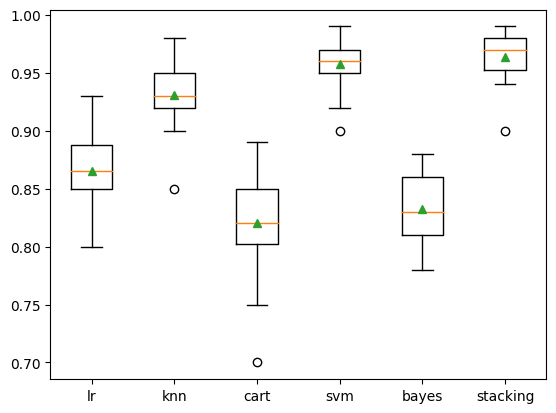

In [8]:

# connecting libraries
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot


# generating a data set
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y

# cumulative ensemble of models
def get_stacking():

	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	
	# metamodels
	level1 = LogisticRegression()
	
	# stacking
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model


# models for evaluation
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models


# evaluation of the model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores


# creating a data set
X, y = get_dataset()

# getting models
models = get_models()

# evaluation
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# model performance comparison graph
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()